In [13]:
import cv2
import numpy as np
import google.generativeai as genai
import os

genai.configure(api_key=os.environ.get("GENAI_API_KEY"))

prevPencil, prevEraser, prevx, prevy = False, False, None, None
process, clear = False, False

def draw(event, x, y, flags, param):
    global prevPencil, prevEraser, prevx, prevy, process, clear
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button clicked
        if 550 < x < 630 and 10 < y < 50:
            process = True
            print("Processing")
        elif 480 < x < 540 and 10 < y < 50:
            clear = True
            print("Clearing")
        else:
            prevx, prevy = x, y
            prevPencil = True
    elif event == cv2.EVENT_MOUSEMOVE:  # Mouse moved
        if prevPencil:
            cv2.line(canvas, (prevx, prevy), (x, y), (0, 255, 0), 2)
            prevx, prevy = x, y
        elif prevEraser:
            cv2.circle(canvas, (prevx, prevy), 15, (0, 0, 0), cv2.FILLED)
            cv2.circle(canvas, (x, y), 15, (0, 0, 255), cv2.FILLED)
            cv2.line(canvas, (prevx, prevy), (x, y), (0, 0, 0), 10)
            prevx, prevy = x, y
    elif event == cv2.EVENT_LBUTTONUP:  # Left mouse button released
        prevPencil = False
    elif event == cv2.EVENT_RBUTTONDOWN:  # Right mouse button clicked
        prevx, prevy = x, y
        cv2.circle(canvas, (x, y), 15, (0, 0, 255), cv2.FILLED)
        prevEraser = True
    elif event == cv2.EVENT_RBUTTONUP:  # Right mouse button released
        cv2.circle(canvas, (prevx, prevy), 15, (0, 0, 0), cv2.FILLED)
        prevEraser = False

try:
    previndex = None
    prevPencil = None
    canvas = np.zeros((480, 640, 3), dtype=np.uint8) 
    prevEraser = None

    cv2.namedWindow("Canvas")
    cv2.setMouseCallback("Canvas", draw)  # Set the mouse callback function

    while True:
        if process:
            cv2.imwrite('input.png', canvas)
            model = genai.GenerativeModel("gemini-1.5-flash")
            myfile = genai.upload_file("input.png")
            result = model.generate_content(
                [myfile, "\n\n", "Solve the equation in this image and write the equation and answer in correct mathematical notation. Represent exponentiation using the ^ symbol and fractions using the / symbol. For integration, logarithms, differentiation use brackets to enclose equations and other mathematical functions, use the appropriate notation. For example, write the square root of x as sqrt(x). Give steps used to solve also. Include not more than 5 words in each line of response. Replace all special symbols which cannot be typed using keyboard with their short name", "\n\n"]
            )

            # Clear the canvas and display the result
            cv2.rectangle(canvas, (0, 0), (640, 480), (0, 0, 0), cv2.FILLED)
            print(result.text)
            i = 100
            for line in result.text.split("\n"):
                cv2.putText(canvas, line, (50, i), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
                i += 50
            cv2.imwrite('output.png', canvas)
            
            process = False

        if clear:
            cv2.rectangle(canvas, (0, 0), (640, 480),  (0, 0, 0), cv2.FILLED)
            clear = False

        # Draw the toolbar
        cv2.rectangle(canvas, (550, 10), (630, 50), (255, 255, 255), cv2.FILLED)
        cv2.putText(canvas, "PROCESS", (555, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        cv2.rectangle(canvas, (480, 10), (540, 50), (255, 255, 255), cv2.FILLED)
        cv2.putText(canvas, "CLEAR", (485, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        cv2.imshow("Canvas", canvas)

        # Break the loop if the spacebar is pressed
        if cv2.waitKey(1) & 0xFF == ord(' '):
            break

except Exception as e:
    print(e)
finally:
    cv2.destroyAllWindows()

Processing
a = 7
b = 5
a + b = ?
7 + 5 = ?
a + b = 12



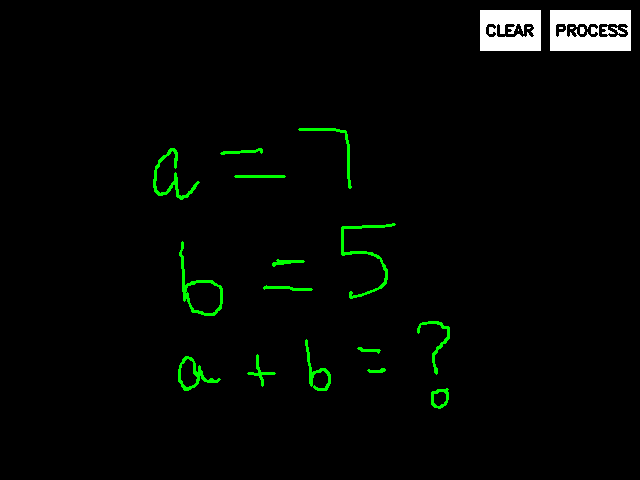

In [14]:
from IPython.display import Image
Image(filename='input.png') 

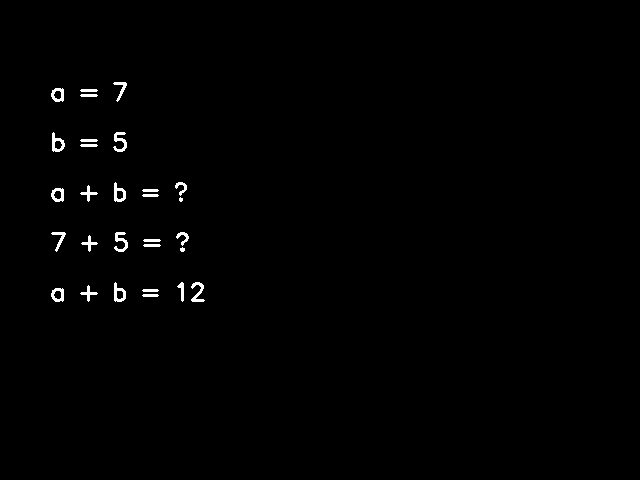

In [15]:
Image(filename='output.png')